# Chapter 6, Example 2

In [ ]:
import torch
import torchvision
import numpy as np
from torch import nn
from torchvision import transforms
from torch.autograd import Variable
import matplotlib.pyplot as plt

# Check the version of PyTorch
print(torch.__version__)

2.0.1+cu118


In [ ]:
# Load and prepare the MNIST dataset.
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,)),
])

trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

This part of code is used for loading and preparing the MNIST dataset:

1. **Data Transformation**:
    - `transforms.ToTensor()`: This transforms a PIL image or a numpy.ndarray (HxWxC in range [0, 255]) to a PyTorch tensor (CxHxW in the range [0.0, 1.0]). This is necessary because PyTorch models require input in the form of tensors.
    - `transforms.Normalize((0.5,), (0.5,))`: This normalizes the tensor with a mean and standard deviation. In this case, it will adjust the range of the pixel values from [0.0, 1.0] to [-1.0, 1.0]. Normalizing the input data helps to stabilize the training. These transformations are composed together using `transforms.Compose`.

2. **Data Loading**:
    - `torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)`: This line downloads the MNIST dataset, loads the training data (since `train=True`), applies the transformations defined above to the data, and stores it in the directory specified by `root`.
    - `torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)`: Similar to the above, but this time it's loading the test data (since `train=False`).

3. **Data Batching and Shuffling**:
    - `torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)`: This line defines a PyTorch data loader for the training data. The data loader is responsible for creating batches of data and shuffling them. The `batch_size` parameter determines the number of samples per batch. The `shuffle` parameter, when set to `True`, shuffles the dataset at every epoch. This shuffling is important for preventing the model from learning the order of the training examples, which helps to ensure that the model remains general and minimizes overfitting.
    - `torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)`: This line does the same as above, but for the test data.

torch.Size([64, 1, 28, 28])


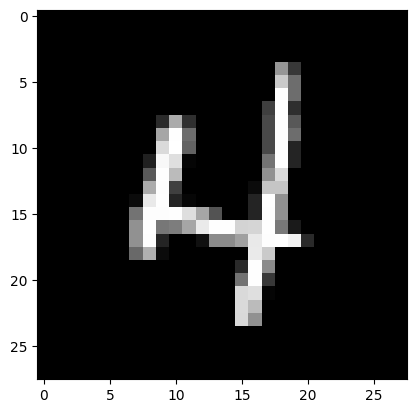

In [ ]:
# Select a random sample
seed = 1
torch.manual_seed(seed)
images, labels = next(iter(trainloader))
print(images.shape)
plt.imshow(images[0].reshape(28,28), cmap="gray")

This part of code is used for selecting and visualizing a random sample from the MNIST dataset.

1. **Set Seed**:
    - `seed = 1; torch.manual_seed(seed)`: These lines set the seed for generating random numbers. Setting a seed ensures that the random numbers generated are predictable and reproducible. In this case, the seed is set to 1.

2. **Load a Batch and Select a Sample**:
    - `images, labels = next(iter(trainloader))`: This line loads a batch of images and corresponding labels from the `trainloader`. The `next` function retrieves the next item from the iterator created by `iter(trainloader)`. This will be a batch of images and their corresponding labels. Since `trainloader` shuffles the data at every epoch, this will effectively be a random batch.
    - `images.shape`: This line prints the shape of the `images` tensor. For MNIST, this would typically be `[batch_size, 1, 28, 28]`, where `batch_size` is the number of images in the batch (64 in our case), 1 represents the number of color channels (grayscale in this case), and 28x28 is the dimension of the images.

3. **Visualize the Sample**:
    - `plt.imshow(images[0].reshape(28,28), cmap="gray")`: This line reshapes the first image in the batch (using `images[0]`) into a 2D 28x28 array (which is the original shape of the MNIST images) and then displays this image using `plt.imshow`. The `cmap="gray"` argument sets the color map to grayscale, which is appropriate for MNIST images.


In [ ]:
# Model definition
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        self.conv1 = nn.Conv2d(1, 3, 3)

    def forward(self, x):
        x1 = self.conv1(x)
        x2 = torch.sigmoid(x1)
        x3 = nn.functional.max_pool2d(x2, 2)
        return x1, x3

This part of code defines a simple model that uses convolution and pooling. Here's a detailed explanation of each part:

1. **Model Definition**:
    - `class MyModel(nn.Module)`: This line starts the definition of a new neural network model, which is a class that inherits from `nn.Module`, PyTorch's base class for all neural network modules.

2. **Initialization Method**:
    - `def __init__(self)`: This is the class constructor, which is called when a new object of this class is created.
    - `super(MyModel, self).__init__()` : This line calls the constructor of the `nn.Module` base class. This is necessary because we're overriding the constructor in our subclass, but we still want the base class's constructor to run.
    - `self.conv1 = nn.Conv2d(1, 3, 3)`: This line defines a 2D convolutional layer. The arguments mean that the layer takes in 1 input channel (since MNIST images are grayscale), outputs 3 feature maps, and uses a 3x3 square convolution kernel.

3. **Forward Method**:
    - `def forward(self, x)`: This method defines the forward pass of the model, i.e., how the model processes inputs to produce outputs.
    - `x1 = self.conv1(x)`: This line applies the convolutional layer defined in the constructor to the input `x`.
    - `x2 = torch.sigmoid(x1)`: This line applies the sigmoid activation function to the output of the convolutional layer. The sigmoid function maps any input to a value between 0 and 1, which can help the model learn complex patterns and prevent the outputs from becoming too large.
    - `x3 = nn.functional.max_pool2d(x2, 2)`: This line applies a 2D max pooling operation to the output of the sigmoid function. Max pooling reduces the spatial dimensions (width and height) of the input by taking the maximum value over a window of size 2x2.

The `forward` method returns two tensors: `x1`, the output of the convolutional layer, and `x3`, the output after applying the sigmoid activation and max pooling.


In [ ]:
# Set filters
w = np.array([[[-1, 0, 1],[-2, 0, 2], [-1, 0, 1]],
     [[1, 2, 1],[0, 0, 0], [-1, -2, -1]],
     [[3, 4, 3], [4, 5, 4], [3, 4, 3]]]).astype(np.float32).reshape(3,1,3,3)
w = torch.from_numpy(w)

model = MyModel()
model.conv1.weight.data = w

In [ ]:
# Evaluate
x = images[0]
u, o = model(x)
print(x.shape)
print(u.shape)
print(o.shape)

torch.Size([1, 28, 28])
torch.Size([3, 26, 26])
torch.Size([3, 13, 13])


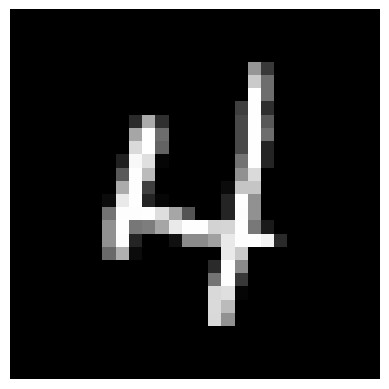

In [ ]:
# Plot input image
plt.figure()
plt.gray()
plt.axis('off')
plt.imshow(x.squeeze().detach().numpy())

(<Axes: >,
 (0.0, 1.0, 0.0, 1.0),
 <matplotlib.image.AxesImage at 0x7975f42ab850>)

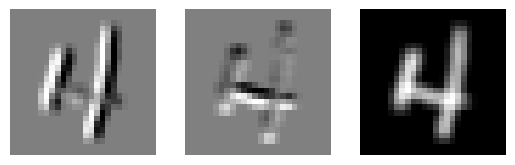

In [ ]:
# Plot u of convolution layer
plt.figure()
plt.gray()
plt.subplot(1,3,1), plt.axis('off'), plt.imshow(u[0,:,:].detach().numpy())
plt.subplot(1,3,2), plt.axis('off'), plt.imshow(u[1,:,:].detach().numpy())
plt.subplot(1,3,3), plt.axis('off'), plt.imshow(u[2,:,:].detach().numpy())

(<Axes: >,
 (0.0, 1.0, 0.0, 1.0),
 <matplotlib.image.AxesImage at 0x7975f431b8e0>)

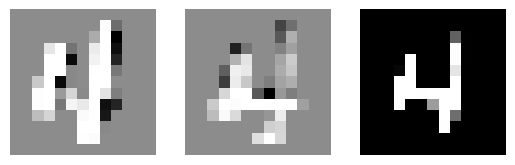

In [ ]:
# Plot output o of pooling layer
plt.figure()
plt.gray()
plt.subplot(1,3,1), plt.axis('off'), plt.imshow(o[0,:,:].detach().numpy())
plt.subplot(1,3,2), plt.axis('off'), plt.imshow(o[1,:,:].detach().numpy())
plt.subplot(1,3,3), plt.axis('off'), plt.imshow(o[2,:,:].detach().numpy())